# Datensatzsichtung (engl. dataset inspection)
Die Datensatzsichtung untergliedert sich in Datenstrukturanalyse, Explorative Datenanalyse und die Datensatzaufbereitung.

## Datenstrukturanalyse (engl. data structure analysis)
Die Stukturiertung des Datensatzes wird durch die Datenstrukturanalyse erkundet. Der Datensatz `complaints_data.csv` wird eingelesen und die Struktur der Daten untersucht. Es werden die ersten 10 Zeilen sowie die wichtigsten Metadaten (Spalten, Datentypen, Anzahl der Werte) angezeigt, um einen ersten Überblick über den Aufbau des Datensatzes zu erhalten.

In [25]:
# Datenstrukturanalyse (engl. data structure analysis)
import pandas as pd
from IPython.display import display

df1 = pd.read_csv('../datasets/complaints_data.csv')

print("--- Vorschau der ersten 10 Zeilen ---")
display(df1.head(10))

print("\n--- Übersicht der Datenstruktur ---")
df1.info()

--- Vorschau der ersten 10 Zeilen ---


,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,"I used to love Comcast. Until all these constant updates. My internet and cable crash a lot at night, and sometimes during the day, some channels don't even work and on demand sometimes don't play either. I wish they will do something about it. Because just a few mins ago, the internet have crashed for about 20 mins for no reason. I'm tired of it and thinking about switching to Wow or something. Please do not get Xfinity."
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provider. I'm taking online classes and multiple times was late with my assignments because of the power interruptions in my area that lead to poor quality internet service. Definitely switching to Verizon. I'd rather pay $10 extra then dealing w/ Comcast and non stopping internet problems.
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,"If I could give them a negative star or no stars on this review I would. I have never worked with any industry with as bad of customer service as Comcast. It is not a matter of money because I make well enough above and beyond to afford their services but they are a legitimate ripoff. I think they are the biggest scam of since the mortgage industry's major meltdown and I hope I move somewhere where Comcast does not exist. The disregard to want to help or do the right thing is honestly astounding. If you have to call, which you do FOR ALL ISSUES - billing, connection/service, adding or removing service, errors, it does not matter you will be transferred minimum of 4 times. Everyone says the same thing and passes the issues to the next person and no one resolves the problem.They offer promotional packages in small timeframes and can never access them again so they then upgrade you without you wishing and change your billing. It has been 5 months and I have been overcharged $40 a month since I started with them. The blatant rudeness that must make you qualified to do this job is the type of quality service that gets you this review. So... Dear Comcast, you suck. Sincerely, a customer who cannot wait to never use your service again."
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,"I've had the worst experiences so far since install on 10/4/16. Nothing but problems. Two no shows on scheduled service appointments, extreme difficulty in adding boxes to the second floor. What is so difficult about adding boxes to an existing account? No thank you, I'm not starting a second account for the second floor of the same house! A separate bundle package? All I wanted was just to add a few boxes. Apparently this is not possible. Well then, I guess it's not possible to remain a customer!"
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,"Check your contract when you sign up for Comcast as their advertised offers do not match the contract they issue. I signed up for $49.99 150Mbps internet for 2 years, however my contract has $19.99 for 25Mbps internet for 2 years. They say there is an add on in place for $30 which boost it to Blast! Pro, however this isn't part of the contract, which means that Comcast can increase the price whenever they want within the 2 years. This means I haven't received the advertised rate. Comcast has so far refused to issue corrected contract, or issue in writing that the $30 will remain at that price for 2 years. I just have to trust them. So watch out, Comcast is doing the usual illegal practices, I'm guessing to catch people out and hope they don't notice and end up paying more than they should."
5,"Terri of Mobile, AL","Nov. 9, 2016",1,Thank God. I am changing to Dish. They gave me awesome pricing and super people to deal with. You can actually understand what they are saying. I'm so excited to finally be able to return this equipment although still haven't received the home security yet as promised 4 times. Go to h*ll Comcast. You have made me miserable and cause me to miss many hours of work with you


--- Übersicht der Datenstruktur ---
<class 'pandas.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   author     5659 non-null   str  
 1   posted_on  5659 non-null   str  
 2   rating     5659 non-null   int64
 3   text       5629 non-null   str  
dtypes: int64(1), str(3)
memory usage: 177.0 KB


## Explorative Datenanalyse (EDA)
Im Rahmen der EDA wird der Datensatz untersucht. Es werden stukturiert und unstrukturiert vorliegende Informationen für die weitere Verarbeitung identifiziert.

### Analyse der strukturierten Daten (engl. analysis of structured data)
Analyse der strukturiert vorliegenden Daten aus den Spalten "author" "posted_on" und "rating".

#### Ortsdaten (engl. location data)

In [26]:
### Ortsdatenanalyse
import pandas as pd
df = pd.read_csv('../datasets/complaints_data.csv')

#### Extrahieren der Bundesstaaten aus der "author"-Spalte
df["state"] = df["author"].str.extract(r",\s*([A-Z]{2})\s*$", expand=False)                 # Spalte "state" für Visualisierung in Datennachverarbeitung

##### State-Codes: alle extrahierten (2 Großbuchstaben am Ende)
all_extracted = df["state"].dropna().unique()

##### gültige State-Codes: US-Bundesstaaten (50 Staaten + DC / 51 Referenz)
all_states_set = {
    "AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA",
    "KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ",
    "NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT",
    "VA","WA","WV","WI","WY","DC"
}
##### ungültige State-Codes
invalid_states = [s for s in all_extracted if s not in all_states_set]
print(f"Bundesstaaten ungültig: {len(invalid_states)} \n{sorted(invalid_states)}\n")

all_states = pd.Series(list(all_states_set))

valid_states_only = df["state"].dropna()
valid_states_only = valid_states_only[valid_states_only.isin(all_states_set)]

#### Verteilung der Beschwerden nach den Bundesstaaten
##### Bundesstaaten MIT Beschwerden
print(f"Bundesstaaten mit Beschwerden: {len(valid_states_only.value_counts())}")
for state, count in valid_states_only.value_counts().items():
    print(f"{state}: {count}")

##### Bundesstaaten OHNE Beschwerden
missing_states = all_states_set - set(valid_states_only.unique())
print(f"\nBundesstaaten ohne Beschwerden: {len(missing_states)}\n",
    sorted(missing_states), sep='')

### Kontrollrechnung (51 Bundesstaaten insgesamt)
print(f"\nKONTROLLE: {len(valid_states_only.value_counts())} + {len(missing_states)} = {len(valid_states_only.value_counts()) + len(missing_states)}")

Bundesstaaten ungültig: 3 
['BC', 'ON', 'PE']

Bundesstaaten mit Beschwerden: 46
FL: 778
CA: 554
GA: 414
IL: 378
PA: 326
NJ: 278
TX: 274
MI: 266
TN: 244
MD: 238
WA: 215
VA: 215
MA: 184
CO: 182
IN: 144
MN: 108
OR: 100
CT: 75
UT: 62
AL: 55
NH: 45
SC: 41
DC: 41
DE: 40
NM: 38
MS: 35
NY: 32
LA: 28
AZ: 22
KY: 21
WV: 21
AR: 19
OH: 12
MO: 12
VT: 12
WI: 9
NC: 7
ME: 7
NV: 5
KS: 4
ND: 2
HI: 2
ID: 2
AK: 1
WY: 1
NE: 1

Bundesstaaten ohne Beschwerden: 5
['IA', 'MT', 'OK', 'RI', 'SD']

KONTROLLE: 46 + 5 = 51


#### Zeitdaten (engl. time data)

In [27]:
# Zeitdatenanalyse
print("=== Zeitdatenanalyse ===\n")
import pandas as pd
df = pd.read_csv('../datasets/complaints_data.csv')
# 1. Datum konvertieren (Format: "Nov. 22, 2016")
df['date'] = pd.to_datetime(df['posted_on'], format='mixed')

## Zeitraum
print("*** Zeitraum ***")
print(f"Erstes Datum:   {df['date'].min().strftime('%Y-%m-%d')}")
print(f"Letztes Datum:  {df['date'].max().strftime('%Y-%m-%d')}")
total_days = (df['date'].max() - df['date'].min()).days
years = total_days // 365
remaining_days = total_days % 365
print(f"Zeitraum:       {years} Jahre, {remaining_days} Tage ({total_days} Tage)")

## Datum extrahieren
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['year_month'] = df['date'].dt.to_period('M')

# Monatskategorie für korrekte Sortierung
months_order = pd.date_range(start='2026-01-01', end='2026-12-01', freq='MS').strftime('%B').tolist()
df['month_name'] = pd.Categorical(df['month_name'], categories=months_order, ordered=True)

# DataFrame chronologisch sortieren
df = df.sort_values(['year', 'month']).reset_index(drop=True)

# Verteilung der Beschwerden
print("\n*** Verteilumng der Beschwerden ***")

## Verteilung pro Jahr
print("\nVerteilung pro Jahr:")
print(df['year'].value_counts().sort_index())

## Verteilung pro Monat
print("\nVerteilung pro Monat:")
print(df['month_name'].value_counts().sort_index())

## Verteilung pro Wochentag
print("\nVerteilung pro Wochentag:")
print(df['weekday'].value_counts())

=== Zeitdatenanalyse ===

*** Zeitraum ***
Erstes Datum:   2000-07-31
Letztes Datum:  2016-11-22
Zeitraum:       16 Jahre, 118 Tage (5958 Tage)

*** Verteilumng der Beschwerden ***

Verteilung pro Jahr:
year
2000       1
2001       2
2002       1
2003       6
2004      10
2006      34
2007     106
2008     441
2009     462
2010     415
2011     357
2012     418
2013     313
2014     770
2015    1477
2016     846
Name: count, dtype: int64

Verteilung pro Monat:
month_name
January      485
February     476
March        441
April        369
May          394
June         461
July         529
August       540
September    507
October      526
November     505
December     426
Name: count, dtype: int64

Verteilung pro Wochentag:
weekday
Wednesday    993
Tuesday      960
Thursday     861
Monday       820
Friday       802
Saturday     659
Sunday       564
Name: count, dtype: int64


#### Bewertungen (engl. rating data)

*** Absolute Verteilung der Bewertungen ***

rating
1    3734
0    1560
2     260
3      54
5      32
4      19
Name: count, dtype: int64


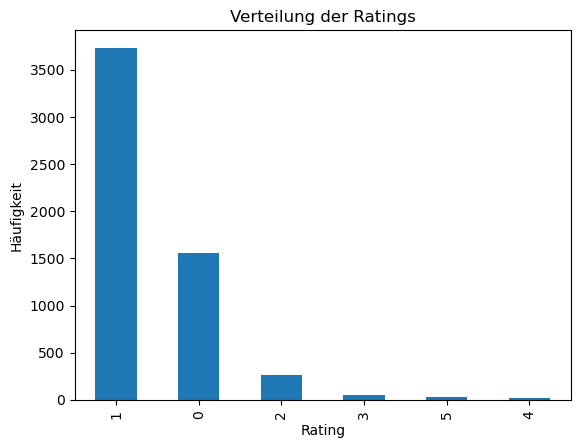

*** Relative Verteilung der Bewertungen ***

rating
1    65.98%
0    27.57%
2     4.59%
3     0.95%
5     0.57%
4     0.34%
Name: proportion, dtype: str


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../datasets/complaints_data.csv')

# Absolute Verteilung
print("*** Absolute Verteilung der Bewertungen ***\n")
verteilung = df['rating'].value_counts()
print(verteilung)

# Balkendiagramm der Verteilung
df['rating'].value_counts().plot(kind='bar')
plt.title('Verteilung der Ratings')
plt.xlabel('Rating')
plt.ylabel('Häufigkeit')
plt.show()

# Prozentuale Verteilung
print("*** Relative Verteilung der Bewertungen ***\n")
prozente = (df['rating'].value_counts(normalize=True) * 100).round(2).astype(str) + '%'
print(prozente)

#### Fehlwerterkennung (engl. missing value detection)
Bei der Fehlwerterkennung werden fehlende Daten (NaNs/NaTs) in den strukturiert oder unstrukturiert vorliegenden Daten identifiziert.

In [1]:
# Fehlwerterkennung (engl. missing value detection)
print("=== Fehlwerterkennung ===\n")
import pandas as pd
df = pd.read_csv('../datasets/complaints_data.csv')

# Fehlwerterfassung
## Fehlwerte in den strukturierte Daten
fehlende_author = df[df['author'].isna()]
fehlende_posted_on = df[df['posted_on'].isna()]
fehlende_rating = df[df['posted_on'].isna()]

## ungültige US-Bundesstaaten ['BC', 'ON', 'PE']
df["state"] = df["author"].str.extract(r",\s*([A-Z]{2})\s*$", expand=False)
all_states_set = {
    "AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA",
    "KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ",
    "NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT",
    "VA","WA","WV","WI","WY","DC"
}
invalid_states = df[~df["state"].isin(all_states_set) & df["state"].notna()]
## Fehlwerte ungültige Bundesstaaten
print("*** Fehlwerterfassung ungültige Bundesstaaten ***\n")
print(invalid_states[['author', 'text']].to_string(index=True, max_colwidth=100))

print(f"\n    Zeilen mit ungültigen US-Bundesstaaten: {len(invalid_states)}")

## Fehlwerte in den unstrukturierte Daten
fehlende_text = df[df['text'].isna()]

# Fehlwertausgabe
## Fehlwertausgabe stukturierte Daten
print("\n*** Fehlwerterfassung strukturierte Daten ***")
print(f"    Fehlwerte in 'author': {len(fehlende_author)}")
print(f"    Fehlwerte in 'posted_on': {len(fehlende_posted_on)}")
print(f"    Fehlwerte in 'rating': {len(fehlende_rating)}")
## Fehlwertausgabe unstukturierte Daten
print("\n*** Fehlwerterfassung unstrukturierte Daten ***")
print(f"    Fehlwerte in 'text': {len(fehlende_text)}")

=== Fehlwerterkennung ===

*** Fehlwerterfassung ungültige Bundesstaaten ***

                            author                                                                                                 text
1586  Sylvain of San Francisco, BC  If you sign with Comcast, it is very likely you'll have to deal with their customer service - an...
2015        Joshua of Portland, ON  Most recently, Zach, Technician #** came out at my request and gave me a new X1 set top box and ...
3195         Susan of Broomall, PE  I tried calling Comcast to resolve an issue with my ON Demand, I waited almost an hour, was disc...

    Zeilen mit ungültigen US-Bundesstaaten: 3

*** Fehlwerterfassung strukturierte Daten ***
    Fehlwerte in 'author': 0
    Fehlwerte in 'posted_on': 0
    Fehlwerte in 'rating': 0

*** Fehlwerterfassung unstrukturierte Daten ***
    Fehlwerte in 'text': 30


### Analyse der unstrukturierten Daten (engl. analysis of unstructured data)
Analyse der unstrukturiert vorliegenden Daten aus den Spalten "text".

#### Duplikaterkennung (engl. duplicate detection)

In [32]:
### Duplikaterkennung (engl. duplicate detection)
print("=== Duplikaterkennung (engl. duplicate detection) ===\n")

import pandas as pd

# Datensatz laden
df = pd.read_csv('../datasets/complaints_data.csv')

duplikate = df[df.duplicated(keep=False)]

### Duplikate nach Zeilen
print("*** Duplikate pro Zeile ***")
print(f"Gesamtzeilen:                    {len(df):,}")
print(f"Doppelte Gesamtzeilen:           {df.duplicated().sum():,}")
print(f"Duplikat-Anteil:                 {(df.duplicated().sum() / len(df) * 100):.2} %")
print()

### Duplikate darstellen
print("*** Darstellung: Duplikate pro Zeile ***\n")
pd.set_option('display.max_colwidth', None)  # Unbegrenzte Breite
pd.set_option('display.width', 500)          # Gesamtbreite erhöhen
print(df[df.duplicated(keep=False)])

print(f"\nAnzahl doppelter Zeilen: {len(duplikate)}")

### Duplikate nach Spalten
print("\n*** Duplikate pro Spalte ***")
print(f"Doppelte author-Spalten:         {df.duplicated(subset=['author']).sum():,}")
print(f"Doppelte text-Spalten:           {df.duplicated(subset=['text']).sum():,}")
print()

### Duplikate nach Spalte "text
print("*** Duplikate nach Spalte 'text' ***\n")
duplikate_text = df[df.duplicated(subset=['text'], keep=False)]
print(duplikate_text)
print(f"\nAnzahl doppelter text-Zeilen: {len(duplikate_text)}")

=== Duplikaterkennung (engl. duplicate detection) ===

*** Duplikate pro Zeile ***
Gesamtzeilen:                    5,659
Doppelte Gesamtzeilen:           1
Duplikat-Anteil:                 0.018 %

*** Darstellung: Duplikate pro Zeile ***

                          author     posted_on  rating                                                                                                                                                                                                                                                                                                                                                                                                                                          text
1397  Jennifer of Wheatridge, CO  Nov. 2, 2016       1  The services provided by Comcast are ridiculous. You pay lots of money for no adequate service. Everything keeps dropping from the cable to the internet to the phone on important calls. It takes hours to get the custom

#### Textlängenanalyse (engl. text length analysis)
Bei der Textlängenanalyse werden die Längen der Bewertungen und ihrer Sätze anhand der Zeichenanzahl durchgeführt.

=== Textlängenanalyse (engl. text length analysis) ===

*** Textlängen absolut ***

count     5659.00
mean      1233.22
std       1757.99
min          0.00
25%        523.00
50%        864.00
75%       1493.50
max      93136.00
Name: text_length, dtype: float64


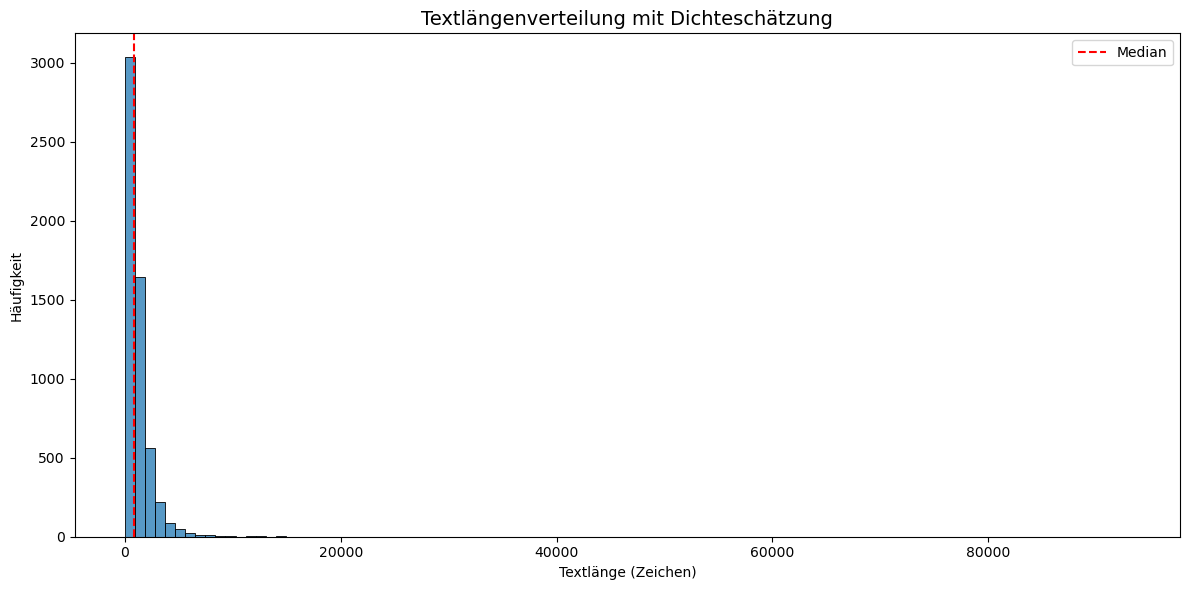

*** Textlängen in Prozent im Datensatz ***

      Bin  Anzahl Prozent
     <100      54   0.95%
  100-500    1254  22.16%
 500-1000    1932  34.14%
1000-1500    1014  17.92%
1500-2000     542   9.58%
2000-2500     320   5.65%
2500-3000     180   3.18%
3000-3500     128   2.26%
    3500+     234   4.14%



In [ ]:
### Textlängenanalyse (engl. text length analysis)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datensatz laden
df3 = pd.read_csv('../datasets/complaints_data.csv')

# Länge berechnen (NaN → "")
df3['text_length'] = df3['text'].fillna('').str.len()

# Statistiken
print("=== Textlängenanalyse (engl. text length analysis) ===\n")

## describe() zeigt nur nicht-leere Werte
print("*** Textlängen absolut ***\n")
print(df3['text_length'].describe().round(2))

# Textlängenhistogramm
plt.figure(figsize=(12, 6))
sns.histplot(data=df3, x='text_length', bins=100)
plt.axvline(df3['text_length'].median(), color='red', linestyle='--', label='Median')
plt.title('Textlängenverteilung mit Dichteschätzung', fontsize=14)
plt.xlabel('Textlänge (Zeichen)')
plt.ylabel('Häufigkeit')
plt.legend()
plt.tight_layout()
plt.show()

# Berechnung
total_valid = df3['text_length'].count()
## Definition der Bins und Labels
bins = [0, 100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 90000]
labels = ['<100', '100-500', '500-1000', '1000-1500', '1500-2000', 
          '2000-2500', '2500-3000', '3000-3500', '3500+']

df3['length_bin'] = pd.cut(df3['text_length'], bins=bins, labels=labels, right=False)

## Tabelle mit Häufigkeiten und Prozenten
print("*** Textlängen in Prozent im Datensatz ***\n")

result = df3['length_bin'].value_counts().sort_index().reset_index()
result.columns = ['Bin', 'Anzahl']
result['Prozent'] = (result['Anzahl'] / total_valid * 100).round(2)
result['Prozent'] = result['Prozent'].astype(str) + '%'
print(result.to_string(index=False))
print()

#### Satzlängenanalyse (engl. sentence length analysis)

=== Textlängenanalyse (engl. text length analysis) ===

*** Satzlängenanalyse (engl. sentence length analysis) ***

Sätze in 'text': 86308 (über 5659 Zeilen)

*** Satz-Statistiken ***
count    5659.00
mean       15.25
std        26.89
min         0.00
25%         7.00
50%        11.00
75%        18.00
max      1706.00
Name: saetze, dtype: float64
*** Satzzahlen in Prozent im Datensatz ***

  Bin  Anzahl Prozent
    0      30   0.53%
  1-2     131   2.31%
  3-4     441   7.79%
  5-9    1698  30.01%
10-19    2111   37.3%
20-29     713   12.6%
30-49     398   7.03%
50-99     116   2.05%
 100+      20   0.35%



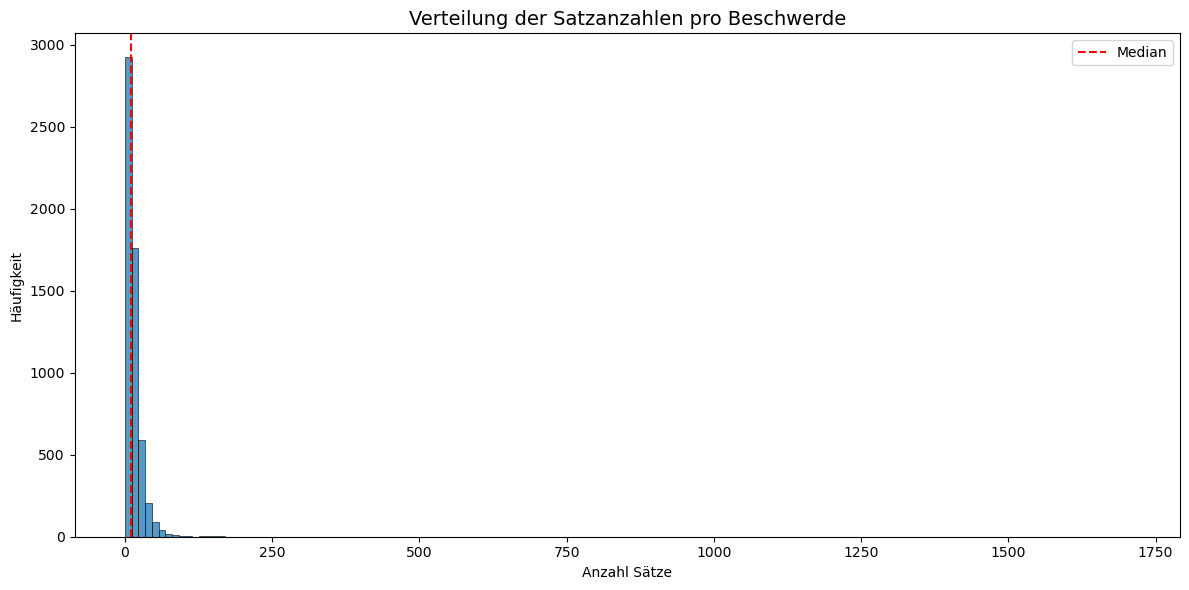

=== Längste 5 Bewertungen ===
Indizes: [5237, 5386, 5362, 5465, 5358]
      text_length  saetze                                                                                                                                                                                                                                                               text
5237      93136.0    1706  Channel 65 did not work since about August 1, 2008 on all non-cable box TVs\nLow or no signals since September 15, 2008.\nTechnicians at house about once a week since October 1, 2008.\nSpecific Dates\nIn October, a technician came to the house and put am...
5386      26593.0     357      As a Taxpaying, American Combat Veteran, I will swear under oath this is a true story & the story before you has been condensed believe it or not.  Today is 07/30/08 and I have been a Comcast customer for 10 years plus.   A couple of weeks before our...
5362      24039.0     289            I originally signed up with Adelphia C

In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Datensatz laden
df3 = pd.read_csv('../datasets/complaints_data.csv')

print("=== Textlängenanalyse (engl. text length analysis) ===\n")

print("*** Satzlängenanalyse (engl. sentence length analysis) ***\n")
def saetze_pandas(df, spalten_name):  # <- df als Parameter!
    """Zählt Sätze in angegebener Spalte mit Pandas."""
    # Explizite Konvertierung zu String und Behandlung von NaNs
    df[spalten_name] = df[spalten_name].astype(str).replace('nan', '')
    
    # Sätze zählen pro Zelle
    df['saetze'] = df[spalten_name].apply(
        lambda x: len([s for s in re.split(r'[.!?]+', str(x)) if s.strip()])
    )
    
    gesamt = df['saetze'].sum()
    print(f"Sätze in '{spalten_name}': {gesamt} (über {len(df)} Zeilen)")
    return gesamt

# Verwendung mit df3
saetze_pandas(df3, 'text')

# Satz-Statistik
# Sicherstellen, dass NaNs behandelt werden, bevor astype(str) angewendet wird
# Wenn astype(str) auf NaN angewendet wird, entsteht "nan", was okay ist, aber
# falls re.split probleme mit float Inputs hat (was hier der Fall scheint für bestimmte Pandas Versionen)
# sicherstellen, dass Apply wirklich Strings bekommt.

df3['saetze'] = df3['text'].fillna('').astype(str).apply(
    lambda x: len([s for s in re.split(r'[.!?]+', x) if s.strip()])
)

print("\n*** Satz-Statistiken ***")
print(df3['saetze'].describe().round(2))

# Satzlängen-Berechnung
total_valid = df3['saetze'].count()  # Anzahl gültiger Satz-Zählungen

## Definieren der Bins und Labels für Satzzahlen
bins = [0, 1, 3, 5, 10, 20, 30, 50, 100, 1000]  # Angepasst an typische Satzzahlen
labels = ['0', '1-2', '3-4', '5-9', '10-19', 
          '20-29', '30-49', '50-99', '100+']

df3['saetze_bin'] = pd.cut(df3['saetze'], bins=bins, labels=labels, right=False)

## Tabelle mit Häufigkeiten und Prozenten
print("*** Satzzahlen in Prozent im Datensatz ***\n")

result = df3['saetze_bin'].value_counts().sort_index().reset_index()
result.columns = ['Bin', 'Anzahl']
result['Prozent'] = (result['Anzahl'] / total_valid * 100).round(2)
result['Prozent'] = result['Prozent'].astype(str) + '%'
print(result.to_string(index=False))
print()

# Histogramm für Sätze
plt.figure(figsize=(12, 6))
sns.histplot(data=df3, x='saetze', bins=150)
plt.axvline(df3['saetze'].median(), color='red', linestyle='--', label='Median')
plt.title('Verteilung der Satzanzahlen pro Beschwerde', fontsize=14)
plt.xlabel('Anzahl Sätze')
plt.ylabel('Häufigkeit')
plt.legend()
plt.tight_layout()
plt.show()

# Textlänge berechnen
df3['text_length'] = df3['text'].astype(str).str.len()

# Die längsten 5 Bewertungen nach text_length finden
laengste_indices = df3.nlargest(5, 'text_length').index.tolist()

print("=== Längste 5 Bewertungen ===")
print(f"Indizes: {laengste_indices}")

# Ausgabe der längsten 5 Bewertungen
top_5 = df3.loc[laengste_indices][['text_length', 'saetze', 'text']].copy()
top_5['text'] = top_5['text'].str[:250] + "..."
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 500)
print(top_5.round(0))

# Längste Bewertung mit Zeilenumbrüchen ausgeben
def text_mit_umbruechen(text, max_zeichen=300):
    """Text in Zeilen mit max_zeichen aufteilen"""
    words = str(text).split()
    lines = []
    current_line = ""
    
    for word in words:
        if len(current_line) + len(word) + 1 <= max_zeichen:
            current_line += word + " "
        else:
            lines.append(current_line.strip())
            current_line = word + " "
    if current_line:
        lines.append(current_line.strip())
    return '\n'.join(lines)

# Anwenden auf Zeile 5237
text_5237 = text_mit_umbruechen(df3.loc[5237, 'text'])
print("=== Zeile 5237 (gesamt) ===")
print(text_5237)

## Datensatzaufbereitung (engl. dataset preparation)
In der Datensatzaufbereitung erfolgt eine Datensatzbereinigung und eine Datensatzvalidierung um den Datensatz für nachfolgende Schritte vorzubereiten.

### Datensatzbereinigung (engl. dataset cleaning)

In [ ]:
# Datensatzbereinigung (engl. dataset cleaning)
import pandas as pd

print("=== Datensatzaufbereitung (engl. dataset preparation) ===\n")

print("*** Datensatzbereinigung (engl. dataset cleaning) ***\n")
df1 = pd.read_csv('../datasets/complaints_data.csv') # Referenzdatensatz
df2 = pd.read_csv('../datasets/complaints_data.csv') # zu bereinigender Datensatz

## Fehlwertbehandlungen (engl. missing value handling)
print("Fehlwertbehandlungen (engl. missing value handling)")

### NaT-handling
nat_texts = df2['text'].isna().sum()
df2 = df2.dropna(subset=['text']).reset_index(drop=True)
print(f"NaTs entfernt:                {nat_texts}\n")

#### Duplikatentfernung (engl. duplicate removal)
print("Duplikatentfernung (engl. duplicate removal)")

print(f"Anzahl der doppelten Zeilen:  {len(df1) - len(df2.drop_duplicates(keep='first'))}") # inklusive NaTs
doppelte_zeilen = df1[df1.duplicated(keep=False)]
print(f"Zeilenindex:                  {doppelte_zeilen.index.tolist()}")

=== Datensatzaufbereitung (engl. dataset preparation) ===

*** Datensatzbereinigung (engl. dataset cleaning) ***

Fehlwertbehandlungen (engl. missing value handling)
NaTs entfernt:                30

Duplikatentfernung (engl. duplicate removal)
Anzahl der doppelten Zeilen:  31
Zeilenindex:                  [1397, 1398]


### Datensatzvalidierung (engl. dataset validation)

In [44]:
## Datensatzvalidierung (engl. dataset validation)
print("=== Datensatzaufbereitung (engl. dataset preparation) ===")
### Bundesstaaten filtern
import pandas as pd

# Datensatz laden und bereinigen
df2 = pd.read_csv('../datasets/complaints_data.csv')
df2 = df2.dropna(subset=['text']).reset_index(drop=True)
df2 = df2.drop_duplicates(keep='first').reset_index(drop=True)

df2["state"] = df2["author"].str.extract(r",\s*([A-Z]{2})\s*$", expand=False)  # Bundesstaat extrahieren

#### kanadische Bundesstaaten löschen
to_drop_states = ['ON', 'BC', 'AB', 'MB','NL','NB','NT','NS','NU','QC','SK','YT','PEI']
to_drop = df2[df2['state'].isin(to_drop_states)].index
df2 = df2.drop(to_drop).reset_index(drop=True)

#### amerikanische Bundesstaaten korrigieren
corrections = {'PE': 'PA'} # Tipfehlerkorrektion
df2['state'] = df2['state'].replace(corrections)

# Ausgabe
print("\n*** Datesatzvalidierung (engl. dataset validation) ***")
print(f"US-Bundesstaaten korrigiert:  {len(corrections)}")
print(f"CAN-Bundesstaaten entfernt:   {len(to_drop)}")
# print(f"NaNs entfernt:  {}") # optional
print("\n*** Ergebnis ***")
print(f"Finaler Datensatz: {len(df2):,} Zeilen")

# Export in neue CSV-Datei
df2.to_csv('../datasets/complaints_data_cleaned.csv', index=False)
print("Export des bereinigten Datensatzes ✓")

=== Datensatzaufbereitung (engl. dataset preparation) ===

*** Datesatzvalidierung (engl. dataset validation) ***
US-Bundesstaaten korrigiert:  1
CAN-Bundesstaaten entfernt:   2

*** Ergebnis ***
Finaler Datensatz: 5,626 Zeilen
Export des bereinigten Datensatzes ✓
